# Face Mask (wearing one or not)

This model will provide predictions as to if the person in a photo is wearing a mask or not.

Import all the necessary packages. We are going to work with the [fastai V1 library](http://www.fast.ai/2018/10/02/fastai-ai/) which sits on top of [Pytorch 1.0](https://hackernoon.com/pytorch-1-0-468332ba5163). The fastai library provides many useful functions that enable us to quickly and easily build neural networks and train our models.

In [71]:
from fastai.vision import *
from fastai.metrics import error_rate
path = 'images/masks'

If you're using a computer with an unusually small GPU, you may get an out of memory error when running this notebook. If this happens, click Kernel->Restart and half this *batch size* number below and try again.

In [72]:
bs = 16

## Looking at the data

We are going to download images from google using the Firefox extension [Download All Images](https://addons.mozilla.org/en-US/firefox/addon/save-all-images-webextension/).  It has a nice preview gallery prior to downloading so we can exlude images that have more than one person in them as well as any other artificats that show in the search results.

For the `mask` photos use the query "person with face mask", and for the `nomask` photos use "person" for your query.

Since the images used to create this model will be different than the ones you use it important to find images that are diverse enough in ethnicity as some photos have people wearing masks with the same color as their skin.  Also, each image should only have one person.

Find about 300-500 images using the Firefox extension, you will end up removing more than half of them becuase they wont meet your criteria.

Save your images to a folder incidated in the `path` variable above.  You should have `[path]/train/mask` and `[path]/train/nomask`.

In [73]:
#tfms = get_transforms(do_flip=False)
np.random.seed(42)
data = ImageDataBunch.from_folder(path, valid_pct=0.2, ds_tfms=get_transforms(), size=224, bs=bs)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (168 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
nomask,nomask,nomask,nomask,nomask
Path: images/masks;

Valid: LabelList (41 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
nomask,mask,nomask,mask,nomask
Path: images/masks;

Test: None

In [74]:
data.classes

['mask', 'nomask']

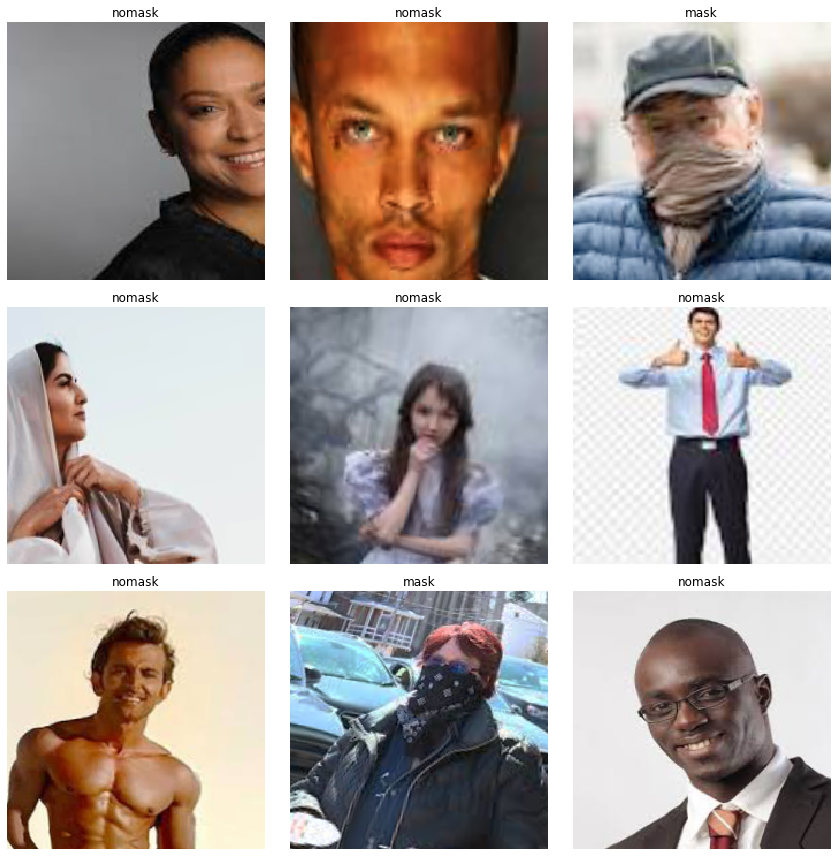

In [75]:
data.show_batch(rows=3)

Lets have a look at how many images we have in our training set (3rd number) and how many in our automated validation set (last number)

In [76]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['mask', 'nomask'], 2, 168, 41)

## Training: resnet34

Now we will start training our model. We will use a [convolutional neural network](http://cs231n.github.io/convolutional-networks/) backbone and a fully connected head with a single hidden layer as a classifier.

We will train for 6 epochs (6 cycles through all our data) and save the result.

In [77]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [78]:
learn.fit_one_cycle(6)

epoch,train_loss,valid_loss,error_rate,time
0,1.087109,0.634211,0.195122,00:03
1,0.665631,0.185131,0.048780,00:03
2,0.472394,0.078517,0.024390,00:03
3,0.333665,0.019637,0.000000,00:03
4,0.253377,0.016920,0.000000,00:03
5,0.232801,0.016167,0.000000,00:03


In [79]:
learn.save('stage-1')

## Results

In [80]:
interp = ClassificationInterpretation.from_learner(learn)

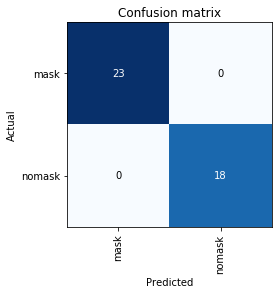

In [81]:
interp.plot_confusion_matrix()

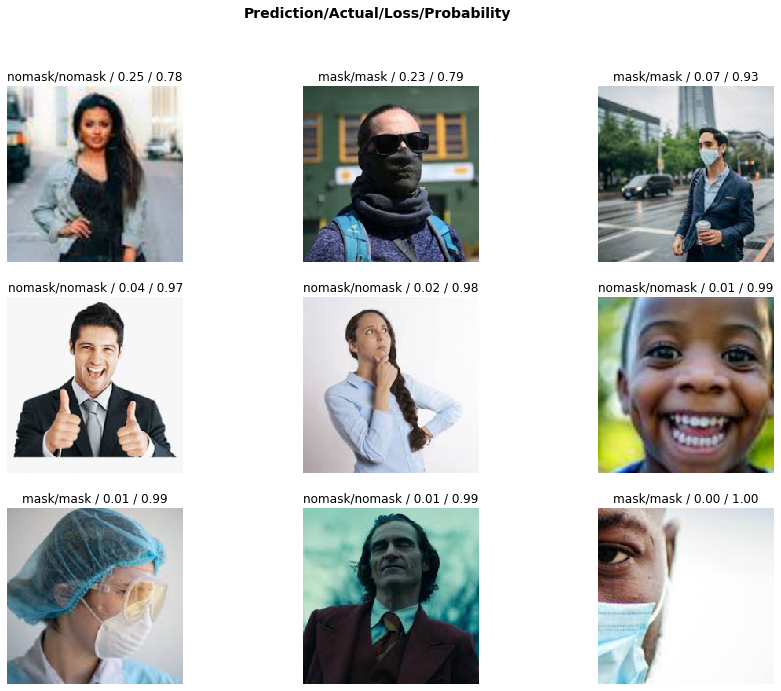

In [82]:
interp.plot_top_losses(9, figsize=(15,11))

That's a pretty accurate model!